Trying some code from templateMatching.py  

In [2]:
import warnings

# Ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute)
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
sim = Aer.get_backend('qasm_simulator')

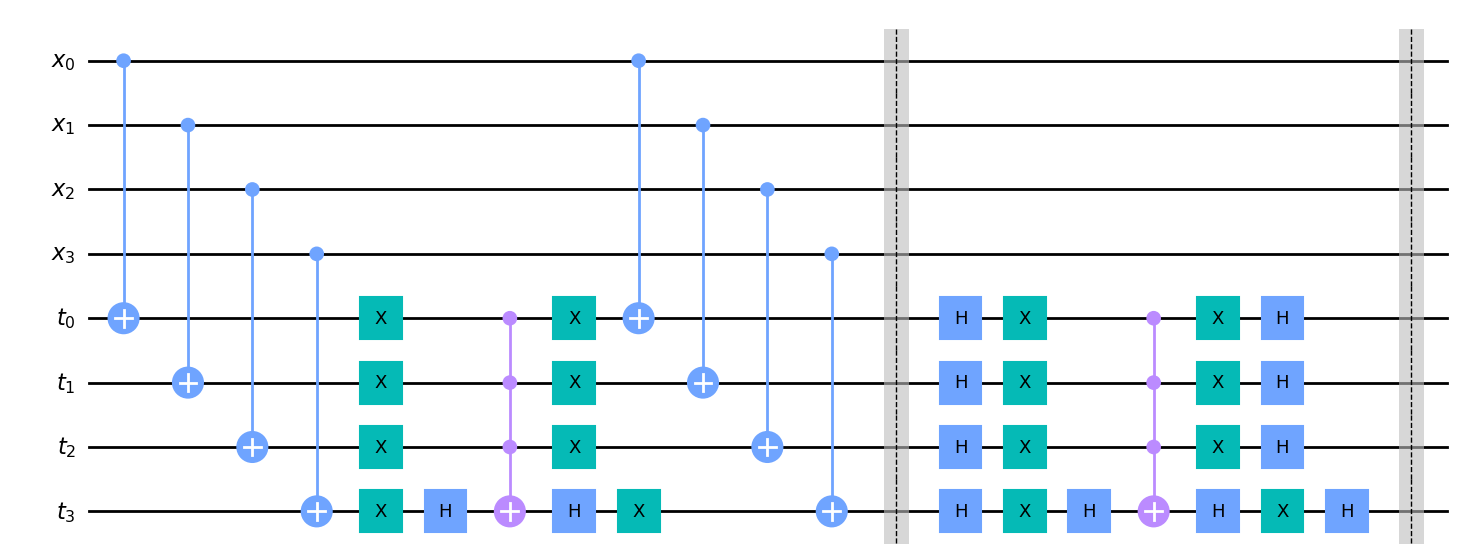

In [10]:
x  = QuantumRegister(4, name='x')
t  = QuantumRegister(4, name='t')
circuit = QuantumCircuit(x, t)


#Oracle

#CNOT
circuit.cx(x, t) 
#|0>-controlled-Z
circuit.x(t)
circuit.h(t[-1])
circuit.mct(t[:-1], t[-1])
circuit.h(t[-1])
circuit.x(t)
#CNOT
circuit.cx(x, t)        
circuit.barrier()


#Diffuser
#hadamard
circuit.h(t)
#X
circuit.x(t)
#controled-Z
circuit.h(t[-1])
circuit.mct(t[:-1], t[-1])
circuit.h(t[-1])
#X
circuit.x(t)
#Hadamard
circuit.h(t)
   
circuit.barrier()
circuit.draw('mpl')

code from amplitudeAmplification.py

#####################################################
#                                                   #
#                                                   #
#      Amplitude Amplification                      #
#                                                   #
#      A simple amplitude amplification example.    #
#                                                   #
#      Please acknowledge the use of this code.     #
#                                                   #
#      Author: Simon J. Williams                    #
#                                                   #
#                                                   #
#####################################################


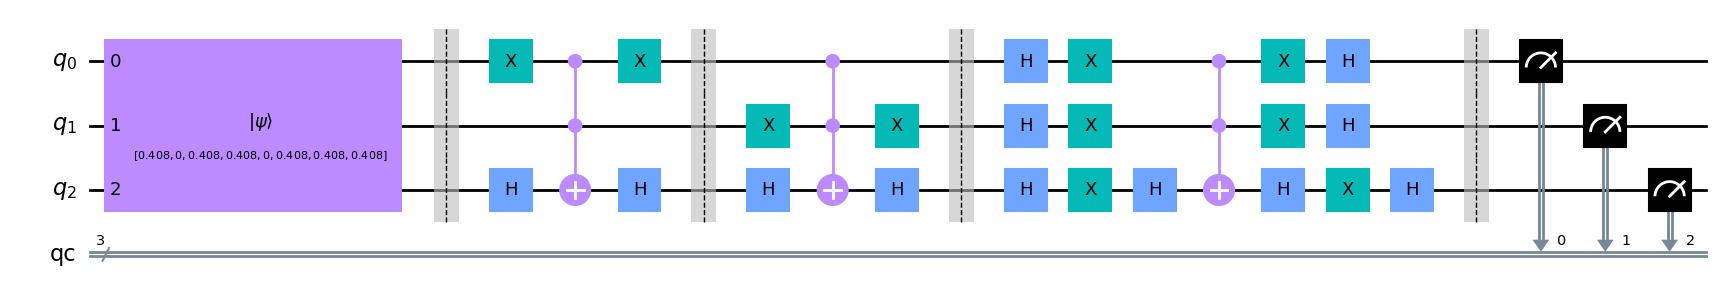

In [24]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import (QuantumCircuit, QuantumRegister,
                    ClassicalRegister, execute, Aer)
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor

print('#####################################################')
print('#                                                   #')
print('#                                                   #')
print('#      Amplitude Amplification                      #')
print('#                                                   #')
print('#      A simple amplitude amplification example.    #')
print('#                                                   #')
print('#      Please acknowledge the use of this code.     #')
print('#                                                   #')
print('#      Author: Simon J. Williams                    #')
print('#                                                   #')
print('#                                                   #')
print('#####################################################')

### Define Aer simulator
sim = Aer.get_backend('qasm_simulator')

def state_preparation(n_qubits, state):

    ### Build state preparation circuit
    state_prep = QuantumCircuit(n_qubits)
    state_prep.initialize(state, [i for i in range(n_qubits)])

    return state_prep

def circuitBuild(n_qubits, initial_state, good_state, itr=1):

    ### Build state preparation circuit
    state_prep = state_preparation(n_qubits, initial_state)

    ### Define Registers
    q  = QuantumRegister(n_qubits, name = 'q')
    qc = ClassicalRegister(n_qubits, name = 'qc')

    ### Construct quantum circuit with state preparation
    circuit = QuantumCircuit(q, qc).compose(state_prep, q)
    circuit.barrier()

    for k in range(itr):
        ### Construct oracles
        for i in range(len(good_state)):
            for j in range(n_qubits):
                if good_state[i][j] == 0:
                    circuit.x(q[j])
            circuit.h(q[-1])
            circuit.mct(q[:-1], q[-1])
            circuit.h(q[-1])
            for j in range(n_qubits):
                if good_state[i][j] == 0:
                    circuit.x(q[j])
                
            circuit.barrier()
    
        ### Apply Grover difuser
        circuit.h(q)
        circuit.x(q)
        circuit.h(q[-1])
        circuit.mct(q[:-1], q[-1])
        circuit.h(q[-1])
        circuit.x(q)
        circuit.h(q)
        circuit.barrier()
    
    ### Measure
    circuit.measure(q, qc)

    return circuit

### Define initial state
initial_state = [
    1./np.sqrt(6),
    0,
    1./np.sqrt(6),
    1./np.sqrt(6),
    0,
    1./np.sqrt(6),
    1./np.sqrt(6),
    1./np.sqrt(6),
]

### Define 'good' states
good_state = [[0,1,1],[1,0,1]]

itr      = 1
n_qubits = 3
circuit  = circuitBuild(n_qubits, initial_state, good_state, itr)
circuit.draw('mpl')



Job Status: job has successfully run


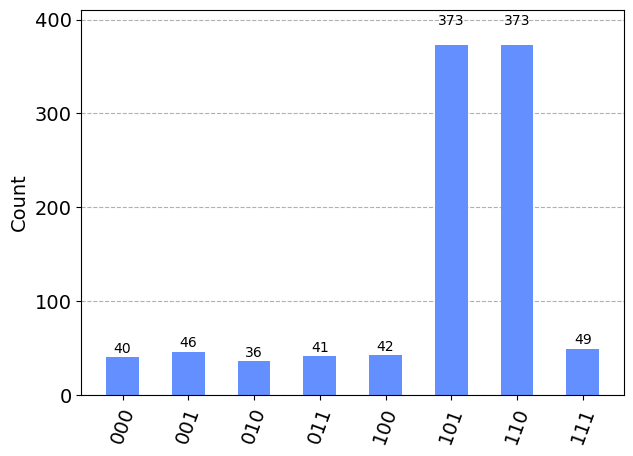

In [25]:
### Run for 1000 shots
job = execute(circuit, sim, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)


#####################################################
#                                                   #
#                                                   #
#      Amplitude Amplification                      #
#                                                   #
#      A simple amplitude amplification example.    #
#                                                   #
#      Please acknowledge the use of this code.     #
#                                                   #
#      Author: Simon J. Williams                    #
#                                                   #
#                                                   #
#####################################################


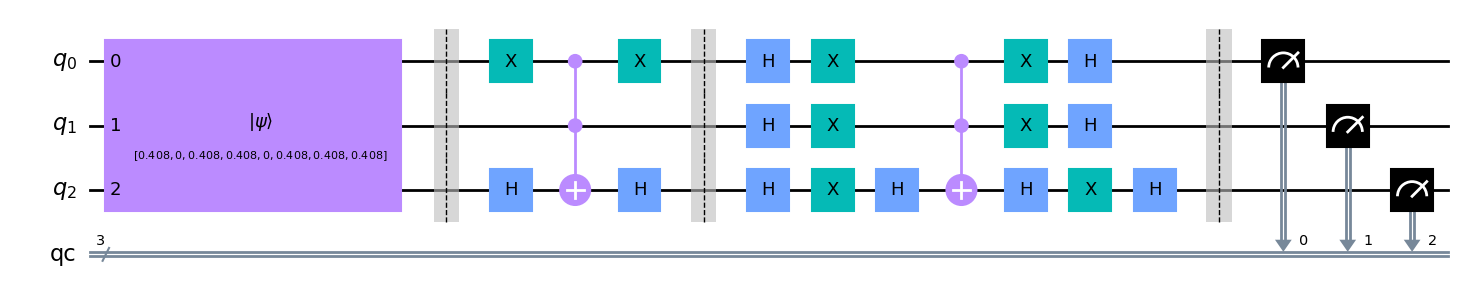

In [26]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import (QuantumCircuit, QuantumRegister,
                    ClassicalRegister, execute, Aer)
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor

print('#####################################################')
print('#                                                   #')
print('#                                                   #')
print('#      Amplitude Amplification                      #')
print('#                                                   #')
print('#      A simple amplitude amplification example.    #')
print('#                                                   #')
print('#      Please acknowledge the use of this code.     #')
print('#                                                   #')
print('#      Author: Simon J. Williams                    #')
print('#                                                   #')
print('#                                                   #')
print('#####################################################')

### Define Aer simulator
sim = Aer.get_backend('qasm_simulator')

def state_preparation(n_qubits, state):

    ### Build state preparation circuit
    state_prep = QuantumCircuit(n_qubits)
    state_prep.initialize(state, [i for i in range(n_qubits)])

    return state_prep

def circuitBuild(n_qubits, initial_state, good_state, itr=1):

    ### Build state preparation circuit
    state_prep = state_preparation(n_qubits, initial_state)

    ### Define Registers
    q  = QuantumRegister(n_qubits, name = 'q')
    qc = ClassicalRegister(n_qubits, name = 'qc')

    ### Construct quantum circuit with state preparation
    circuit = QuantumCircuit(q, qc).compose(state_prep, q)
    circuit.barrier()

    for k in range(itr):
        ### Construct oracles
        for i in range(len(good_state)):
        #for j in range(n_qubits):
            if good_state[i] == 0:
                circuit.x(q[i])
        circuit.h(q[-1])
        circuit.mct(q[:-1], q[-1])
        circuit.h(q[-1])
        for i in range(len(good_state)):
            if good_state[i] == 0:
                circuit.x(q[i])
                
        circuit.barrier()
    
        ### Apply Grover difuser
        circuit.h(q)
        circuit.x(q)
        circuit.h(q[-1])
        circuit.mct(q[:-1], q[-1])
        circuit.h(q[-1])
        circuit.x(q)
        circuit.h(q)
        circuit.barrier()
    
    ### Measure
    circuit.measure(q, qc)

    return circuit

### Define initial state
initial_state = [
    1./np.sqrt(6),
    0,
    1./np.sqrt(6),
    1./np.sqrt(6),
    0,
    1./np.sqrt(6),
    1./np.sqrt(6),
    1./np.sqrt(6),
]

### Define 'good' states
good_state = [0,1,1]

itr      = 1
n_qubits = 3
circuit  = circuitBuild(n_qubits, initial_state, good_state, itr)
circuit.draw('mpl')

Job Status: job has successfully run


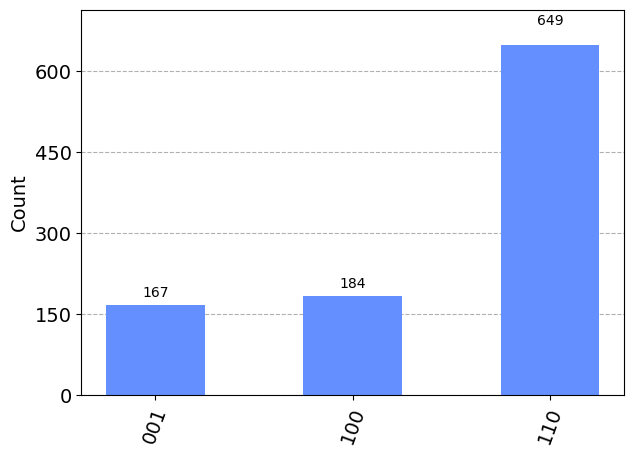

In [27]:
### Run for 1000 shots
job = execute(circuit, sim, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)
